# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


In [5]:
# Load the dataset
data = pd.read_csv("humidity.csv")
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [7]:
# Check for missing values
null = data.isnull().sum()
print(null)
# Display summary statistics
data.describe()

sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64


,sensor_id,lat,lon,pressure,temperature,humidity
count,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000,701548.000000
mean,2835.419842,42.679722,23.333739,94965.292500,24.754990,48.348949
std,798.018890,0.025568,0.039365,2577.210945,14.013001,20.907247
min,1764.000000,42.622000,23.240000,0.000000,-145.120000,0.000000
25%,2224.000000,42.665000,23.310000,94528.017500,20.630000,34.140000
50%,2323.000000,42.685000,23.332000,95005.480000,24.780000,48.350000
75%,3474.000000,42.694000,23.360000,95405.132500,29.870000,62.940000
max,4661.000000,42.738000,23.419000,164926.750000,61.170000,100.000000


In [8]:
# if we add the sensor_id. model will recognized 

In [9]:
data.drop(["sensor_id"],axis = 1,inplace=True)

In [10]:
data.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


## 4000 rows are duplicated

In [12]:
data.duplicated().sum()

4035

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(697513, 5)

## outliers

In [16]:
data.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


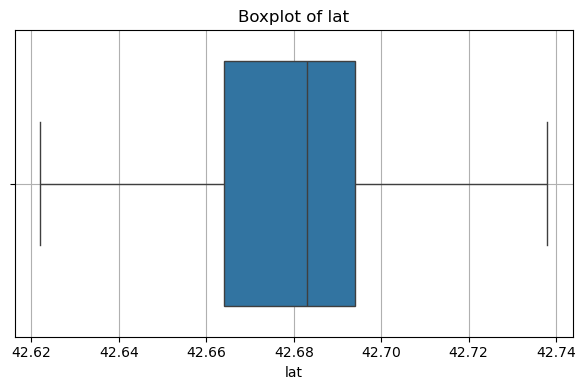

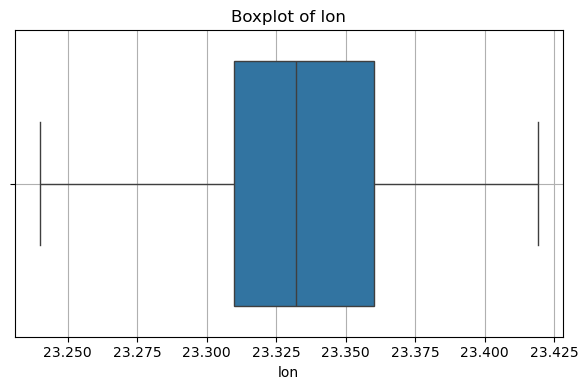

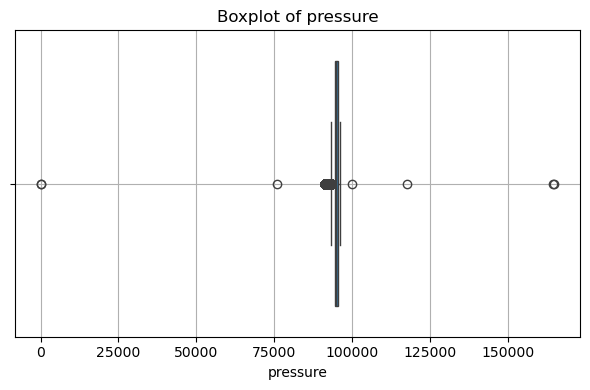

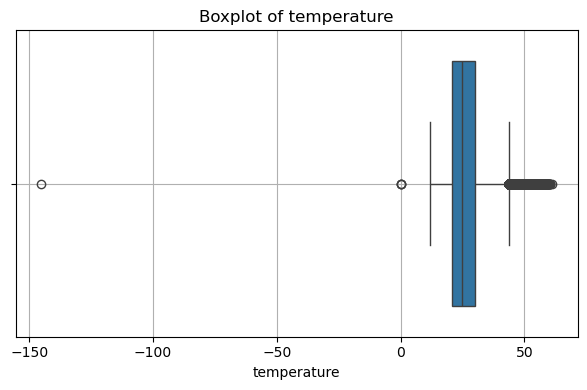

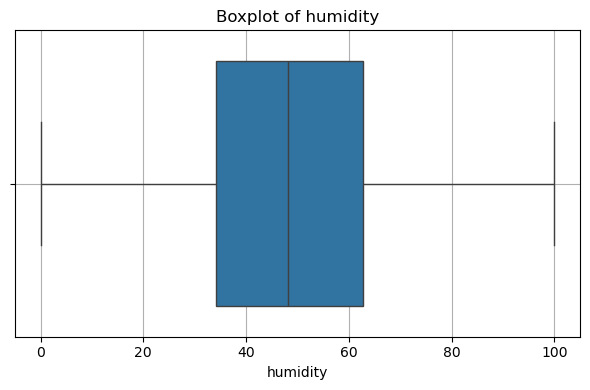

In [17]:
numeric_cols = data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.tight_layout()
plt.show()

## pressure and temperature have some outliers

In [19]:
# removing outliers using IQR method

In [20]:
data.head()

,lat,lon,pressure,temperature,humidity
0,42.738,23.272,95270.27,23.46,62.48
1,42.663,23.273,94355.83,23.06,59.46
2,42.700,23.360,95155.81,26.53,44.38
3,42.624,23.406,94679.57,28.34,38.28
4,42.669,23.318,94327.88,26.31,46.37


In [21]:
def cap_outliers(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower, lower,
                  np.where(data[col] > upper, upper, data[col]))
    return data
data = cap_outliers(data, ["lat", "lon", "pressure", "humidity", "temperature"])

<Axes: xlabel='temperature'>

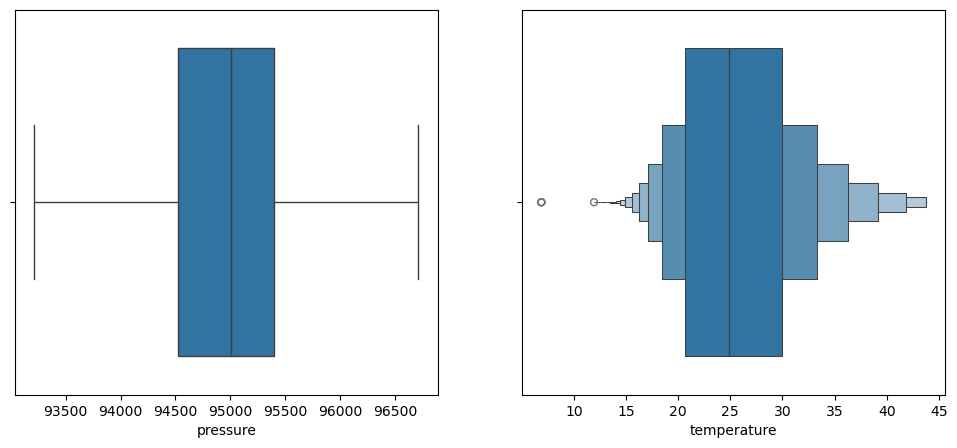

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data = data,x = "pressure")
plt.subplot(1,2,2)
sns.boxenplot(data = data,x = "temperature")

In [23]:
data.shape

(697513, 5)

In [24]:
# Scatter plot to observe relationship

<Axes: xlabel='humidity', ylabel='temperature'>

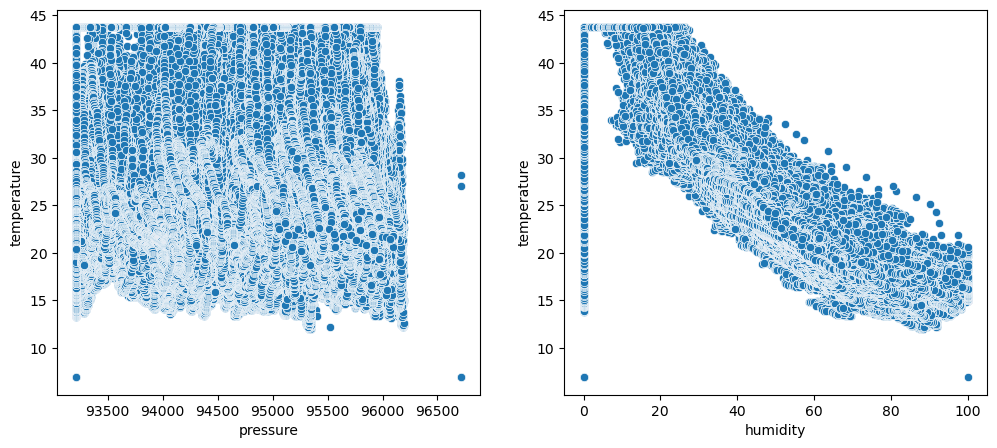

In [25]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data = data,x ="pressure",y = "temperature")
plt.subplot(1,2,2)
sns.scatterplot(data = data,x = "humidity",y = "temperature")

In [26]:
data["humidity"].value_counts()[0]

29742

In [27]:
## zeros change with mean 

In [28]:
data["humidity"].mean()

48.09065507022809

In [29]:
data["humidity"] = data["humidity"].replace(0,np.nan).bfill()

In [30]:
data.describe()

,lat,lon,pressure,temperature,humidity
count,697513.000000,697513.000000,697513.000000,697513.000000,697513.000000
mean,42.679680,23.333633,94901.921710,25.639286,50.207129
std,0.025633,0.039450,663.089938,6.333837,18.308529
min,42.622000,23.240000,93213.750000,6.885000,1.310000
25%,42.664000,23.310000,94524.780000,20.700000,35.890000
50%,42.683000,23.332000,95001.390000,24.830000,49.380000
75%,42.694000,23.360000,95398.800000,29.910000,63.370000
max,42.738000,23.419000,96709.830000,43.725000,100.000000


<Axes: xlabel='humidity', ylabel='temperature'>

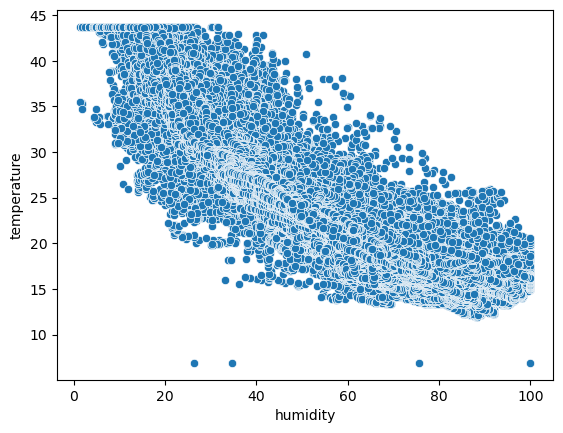

In [31]:
sns.scatterplot(data = data ,x = "humidity",y = "temperature")

In [32]:
data.describe()

,lat,lon,pressure,temperature,humidity
count,697513.000000,697513.000000,697513.000000,697513.000000,697513.000000
mean,42.679680,23.333633,94901.921710,25.639286,50.207129
std,0.025633,0.039450,663.089938,6.333837,18.308529
min,42.622000,23.240000,93213.750000,6.885000,1.310000
25%,42.664000,23.310000,94524.780000,20.700000,35.890000
50%,42.683000,23.332000,95001.390000,24.830000,49.380000
75%,42.694000,23.360000,95398.800000,29.910000,63.370000
max,42.738000,23.419000,96709.830000,43.725000,100.000000


## Data Preprocessing

In [34]:
# Drop any rows with missing values
data.isnull().sum()

lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64

In [35]:
x = data.drop(columns=["temperature"])

In [36]:
y = data["temperature"]

In [37]:
from sklearn.model_selection import train_test_split 

In [38]:
x_train ,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
x_train.shape

(558010, 4)

In [40]:
x_test.shape

(139503, 4)

In [41]:
## standardscaler for linear regression 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sl  = StandardScaler()

In [44]:
x_train_scale = sl.fit_transform(x_train)
x_test_scale = sl.fit_transform(x_test)

In [45]:
# Linear Regression
# from sklearn.model_selection import  LinearRegression
model_1  = LinearRegression()
model_1.fit(x_train_scale,y_train)
# Predict
predection_ = model_1.predict(x_test_scale)
score = model_1.score(x_test_scale,y_test)
print(score)

0.8263565560348468


## Evaluation


In [47]:
# Evaluate model performance

In [48]:
r2 = r2_score(y_test,predection_)
mse = mean_squared_error(y_true=y_test,y_pred=predection_)
mae = mean_absolute_error(y_true=y_test,y_pred=predection_)
print("linear regression model's r2 score:",r2)
print("linear regression model's mean_squared_error:",mse)
print("linear regression model's mean_absolute_error:",mae)

linear regression model's r2 score: 0.8263565560348468
linear regression model's mean_squared_error: 6.983600588657298
linear regression model's mean_absolute_error: 2.076172726910273


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.


 <!-- simple example of randoforestregressor -->

In [51]:
# RandomForestRegressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
model_2 = RandomForestRegressor(n_estimators=50,max_depth=15,random_state=42)

In [54]:
print(model_2)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=42)


In [55]:
model_2.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=42)

In [56]:
predection_1 = model_2.predict(x_test)

In [57]:
r = r2_score(y_test,predection_1)

In [58]:
print(r)

0.9264528509759571


In [59]:
#check for polynomial regression 

In [60]:
from sklearn.preprocessing import PolynomialFeatures

In [61]:
pf  = PolynomialFeatures()

In [118]:
pf.fit(x_test,y_test)

PolynomialFeatures()

In [160]:
p_data = pf.transform(x_train)
print(p_data.shape)

(558010, 15)


In [162]:
y_train.shape

(558010,)

In [164]:
model_1.fit(p_data,y_train)

LinearRegression()

In [146]:
xx = model_1.predict(p_data)

In [183]:
xx.shape

(558010,)

In [203]:
model_1.score(p_data,y_train)

0.8687728757983537

In [219]:
r2_ply = r2_score(y_train,xx)

In [221]:
print(r2_ply)

0.8687728757983537
